1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

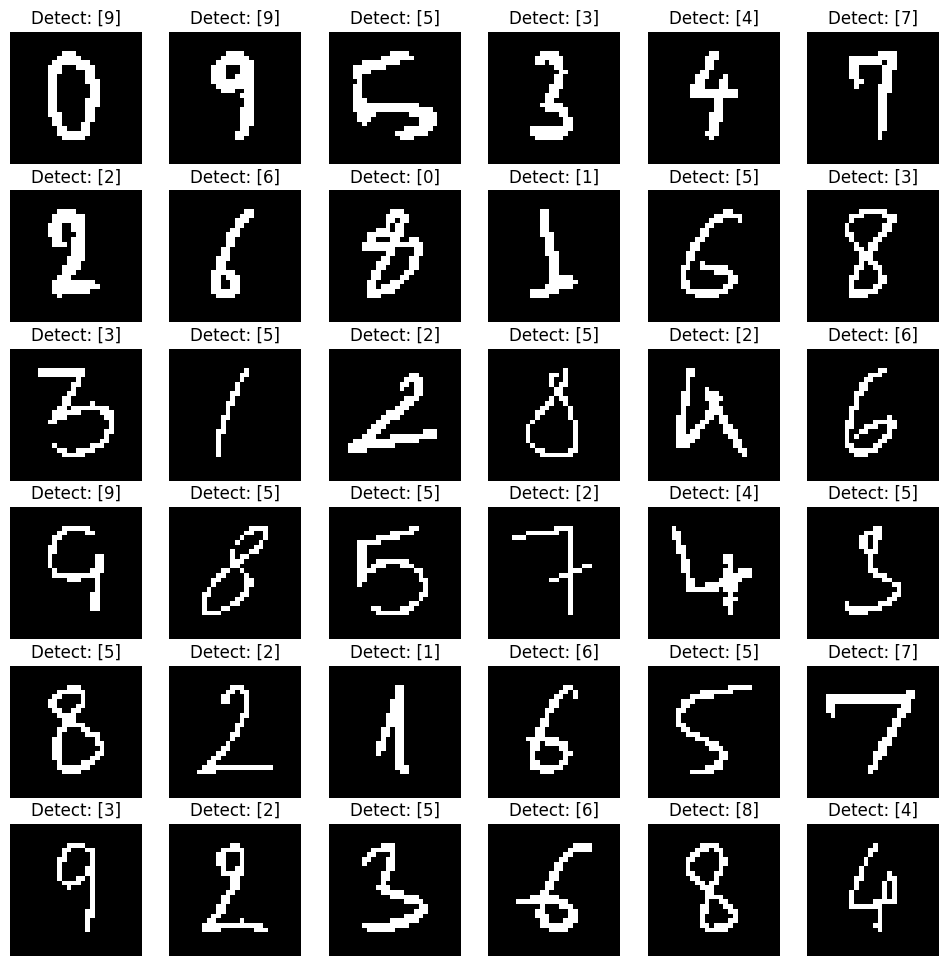

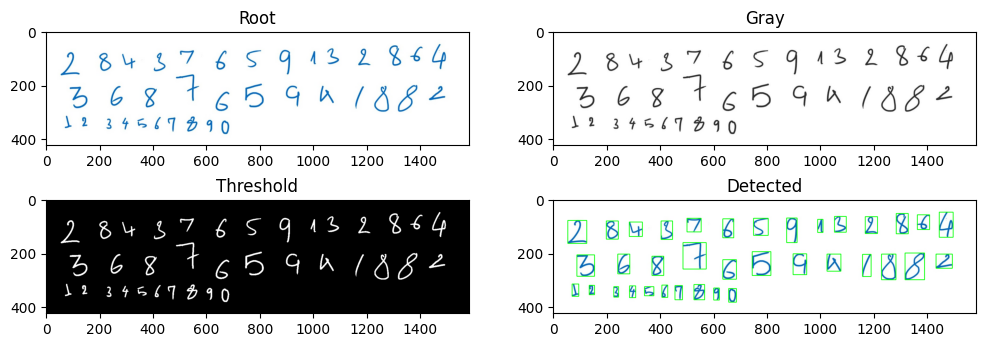

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('../model/model.h5')
# img = cv2.imread('number1.png')
img = cv2.imread('number2.jpg')

# img = cv2.imread('test.jpg')

img_cnt = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary_img = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [cont for cont in contours if cv2.contourArea(cont) > 50]
sub_size = int(np.ceil(np.sqrt(len(contours))))
plt.figure(figsize=(sub_size*2, sub_size*2))

def resize_with_padding(img_roi):
    h, w = img_roi.shape[:2]
    scale = min(28 / w, 28 / h)
    new_w = int(w * scale*0.7)
    new_h = int(h * scale*0.7)
    img_resized = cv2.resize(img_roi, (new_w, new_h))

    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    res = np.zeros((28, 28), dtype=np.uint8)
    res[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = img_resized
    res = np.expand_dims(res, axis=-1)
    res = np.array([res])
    return res

for i, contour in enumerate(contours, start=1):
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img_cnt, (x, y), (x+w, y+h), (0, 255, 0), 2)
    img_roi = binary_img[y:y+h, x:x+w]
    
    res = resize_with_padding(img_roi)  # resizing to 28x28 with padding
    
    num = np.argmax(model.predict(res), axis=-1)

    plt.subplot(sub_size, sub_size, i)
    plt.axis('off')
    plt.imshow(res[0], cmap='gray')
    plt.title(f'Detect: {num}')
    i += 1
    

plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
plt.title('Root')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('Gray')
plt.imshow(gray, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Threshold')
plt.imshow(binary_img, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Detected')
plt.imshow(cv2.cvtColor(img_cnt, cv2.COLOR_BGR2RGB))